# Multi-Layer Perceptron, MNIST
---
In this notebook, we will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.

The process will be broken down into the following steps:
>1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset!

Before we begin, we have to import the necessary libraries for working with data and PyTorch.

In [8]:
import torch
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a few moments, and you should see your progress as the data is loading. You may also choose to change the `batch_size` if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.

In [7]:
from torchvision import datasets
from torchvision.transforms import transforms

batch_size=20

transform=transforms.ToTensor()

train_data=datasets.MNIST('root',download=True,train=True,transform=transform)
test_data=datasets.MNIST('root',download=True,train=False,transform=transform)


trainloader=torch.utils.data.DataLoader(train_data,shuffle=True,batch_size=batch_size)
testloader=torch.utils.data.DataLoader(test_data,shuffle=True,batch_size=batch_size)


Extracting root\MNIST\raw\train-images-idx3-ubyte.gz to root\MNIST\raw



Extracting root\MNIST\raw\train-labels-idx1-ubyte.gz to root\MNIST\raw



Extracting root\MNIST\raw\t10k-images-idx3-ubyte.gz to root\MNIST\raw



Extracting root\MNIST\raw\t10k-labels-idx1-ubyte.gz to root\MNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


### Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

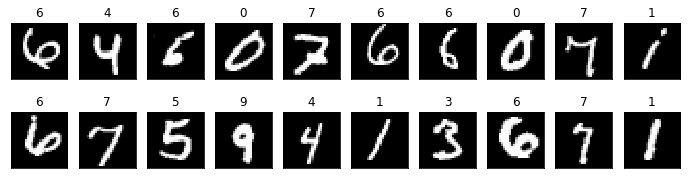

In [39]:
image, labels=next(iter(trainloader))
#plt.imshow(np.squeeze(image[1]),cmap='gray')

fig=plt.figure(figsize=(12,3))
for i in range(20):
    ax=plt.subplot(2,20/2,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(image[i]),cmap='gray')
    plt.title(str(labels[i].item()))

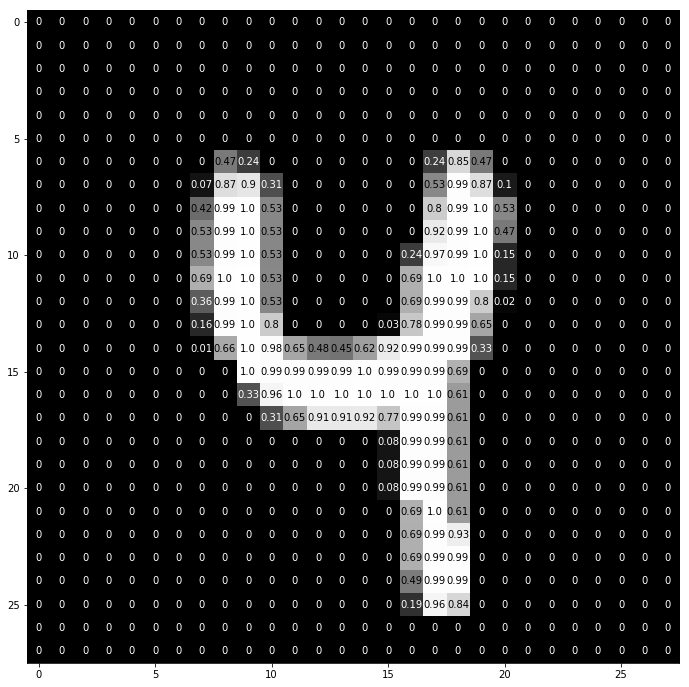

In [45]:
img = np.squeeze(image[1].numpy())

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height=img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')
        


---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [60]:
import torch.nn as nn
import torch.nn.functional as F


class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        
        
        self.fc1=nn.Linear(28*28,512)
        self.fc2=nn.Linear(512,512)
        self.fc3=nn.Linear(512,10)
        
        self.dropout=nn.Dropout(0.2)
        
        
        
    def forward(self,x):
        
        
        x=x.view(-1,28*28)
        x=F.relu(self.fc1(x))
        x=self.dropout(x)
        x=F.relu(self.fc2(x))
        x=self.dropout(x)
        x=self.fc3(x)
        
        return x

In [61]:
model=MLP()
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [62]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [63]:
epochs=50

model.train()
for epoch in range(epochs): 
    
    train_loss=0.0
    
    for image,labels in trainloader:
        output=model(image)
        optimizer.zero_grad()
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()*image.size(0)
    
    
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(trainloader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))
    


Epoch: 1 	Training Loss: 0.582292
Epoch: 2 	Training Loss: 0.478208
Epoch: 3 	Training Loss: 0.452555
Epoch: 4 	Training Loss: 0.418100
Epoch: 5 	Training Loss: 0.433501
Epoch: 6 	Training Loss: 0.406760
Epoch: 7 	Training Loss: 0.428785
Epoch: 8 	Training Loss: 0.392897
Epoch: 9 	Training Loss: 0.411198
Epoch: 10 	Training Loss: 0.388724
Epoch: 11 	Training Loss: 0.420613
Epoch: 12 	Training Loss: 0.392435
Epoch: 13 	Training Loss: 0.394278
Epoch: 14 	Training Loss: 0.377258
Epoch: 15 	Training Loss: 0.376767
Epoch: 16 	Training Loss: 0.355346
Epoch: 17 	Training Loss: 0.367079
Epoch: 18 	Training Loss: 0.387134
Epoch: 19 	Training Loss: 0.373670
Epoch: 20 	Training Loss: 0.357937
Epoch: 21 	Training Loss: 0.368673
Epoch: 22 	Training Loss: 0.346235
Epoch: 23 	Training Loss: 0.366655
Epoch: 24 	Training Loss: 0.346842
Epoch: 25 	Training Loss: 0.354069
Epoch: 26 	Training Loss: 0.363205
Epoch: 27 	Training Loss: 0.338460
Epoch: 28 	Training Loss: 0.366028
Epoch: 29 	Training Loss: 0.3

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [107]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in testloader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(testloader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


Test Loss: 0.875296

Test Accuracy of     0: 96% (947/980)
Test Accuracy of     1: 97% (1107/1135)
Test Accuracy of     2: 93% (969/1032)
Test Accuracy of     3: 90% (918/1010)
Test Accuracy of     4: 92% (912/982)
Test Accuracy of     5: 93% (832/892)
Test Accuracy of     6: 94% (909/958)
Test Accuracy of     7: 93% (961/1028)
Test Accuracy of     8: 94% (920/974)
Test Accuracy of     9: 94% (957/1009)

Test Accuracy (Overall): 94% (9432/10000)


### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

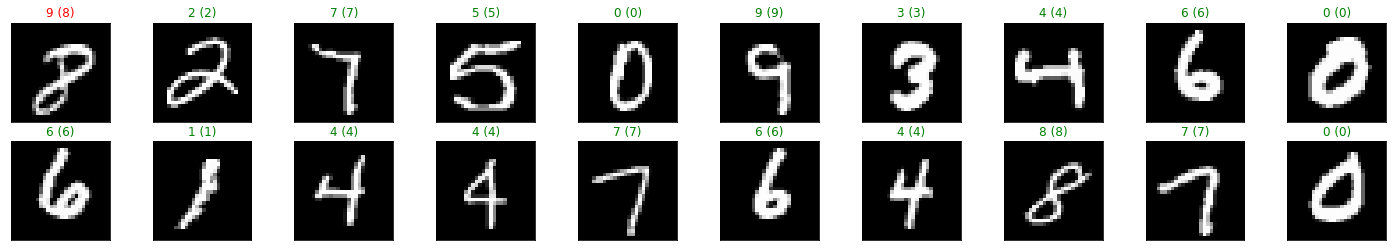

In [65]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))